

Fashion MNIST는 다양한 **패션 아이템 이미지**가 포함된 데이터셋입니다.

### 데이터셋 특징

- **학습 데이터**: 6만 개
- **테스트 데이터**: 1만 개
- **이미지 크기**: 28×28 (그레이스케일)
- **클래스**: 총 10개 (각 클래스에 데이터 균등 분포)

### 클래스 정보

0번부터 9번까지 다음과 같은 패션 아이템으로 구성됩니다:

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot


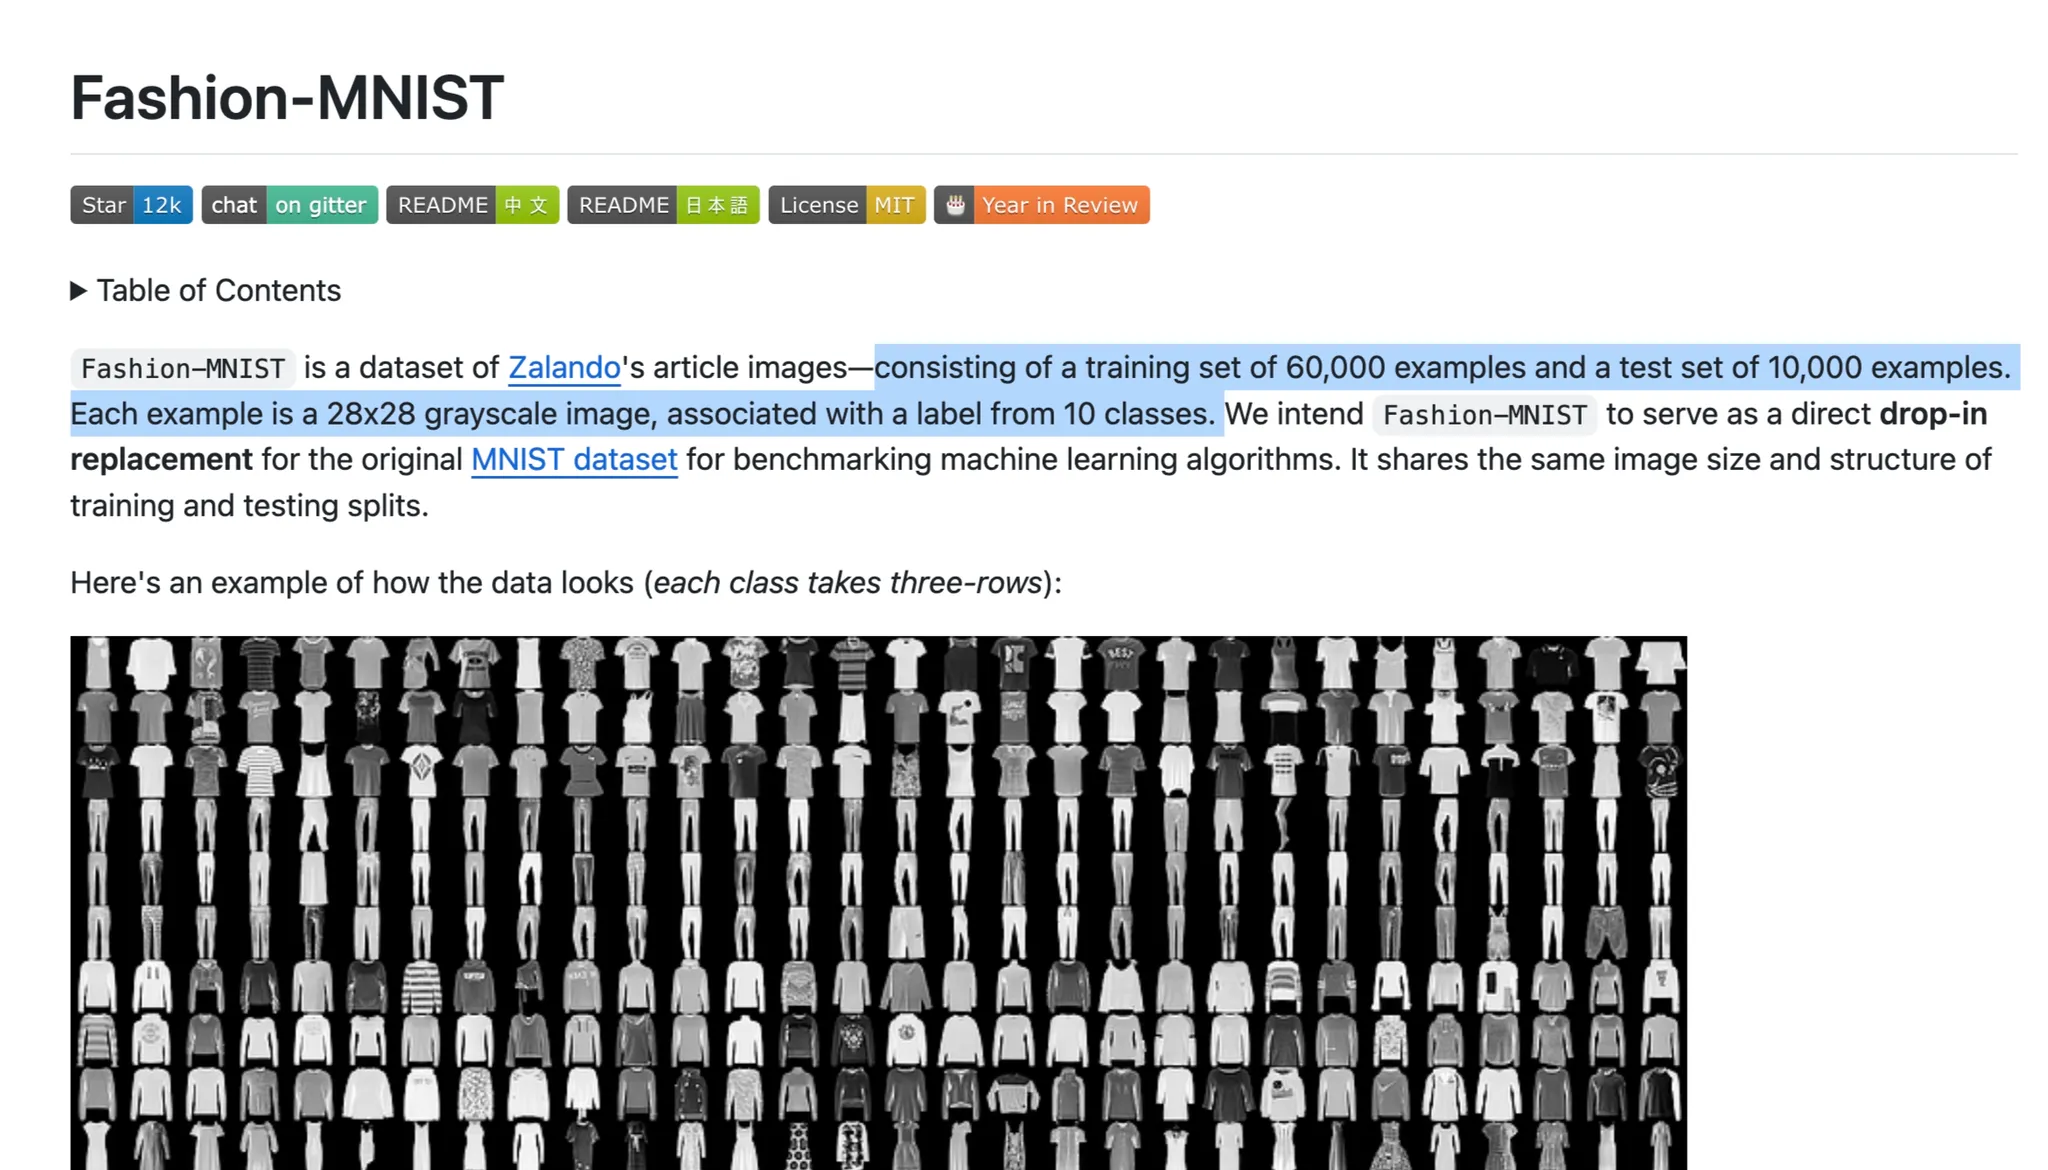

# 라이브러리 호출

In [11]:

import torch
from torchvision import datasets, transforms

# 데이터 셋 생성

In [12]:
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transforms.ToTensor())

In [13]:
print(len(train_dataset)) # 6만장이 있음
print(type(train_dataset)) # tensor, numpy, dataset중에서 데이터셋임
print(type(train_dataset[0])) ## 첫번째 데이터 샘플에 2개의 값(image, label) 튜플이 들어가있음
print(type(train_dataset[0][0])) # 위에서 transform.ToTensor()해와서 튜플중에서 Image tensor가 들어감.
print(len(train_dataset[0])) # 첫번째 데이터 샘플에 2개의 값(image, label) 이들어가있음
print(len(train_dataset[0][0]))


60000
<class 'torchvision.datasets.mnist.FashionMNIST'>
<class 'tuple'>
<class 'torch.Tensor'>
2
1


torch.Size([1, 28, 28])


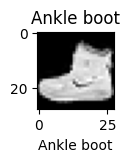

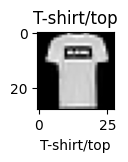

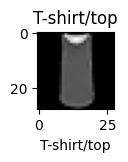

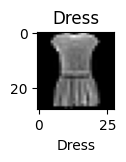

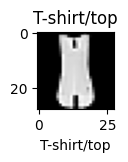

In [23]:
def visualize_data(image, label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    plt.figure(figsize=(1, 1))
    plt.imshow(image, cmap = 'gray')
    plt.title(class_names[label])
    plt.xlabel(class_names[label]) # label에 0이 들어오면 티셔츠
print(train_dataset[0][0].shape)
for i in range(5):
    image = train_dataset[i][0]
    label = train_dataset[i][1]

    visualize_data(image.squeeze_(), label) # chw는 imshow가 못 그림, (hw, hwc)그릴수잇음

In [15]:
from torchvision.transforms import v2    # torchvision v2 스타일 변환 모듈 임포트

pil_image = train_dataset[0][0]          # ← 변수 이름이 'pil_image'지만, 지금은 이미 Tensor임 (ToTensor를 썼으니)
                                          #    타입은 torch.Tensor, shape은 [1, 28, 28]

to_image = v2.ToImage()                  # PIL/NumPy → Tensor(CHW)로 바꾸는 변환 객체 생성
                                          # 이미 Tensor라면 사실상 의미 없음(거의 no-op)

image_tensor = to_image(pil_image)       # 변환 적용. 하지만 입력이 이미 Tensor라 변화 없음

print(type(image_tensor))                       # 타입 확인(출력하려면 print 필요)
image_tensor.shape                       # 텐서 크기 확인(출력하려면 print 필요)

<class 'torchvision.tv_tensors._image.Image'>


torch.Size([1, 28, 28])

In [16]:
to_dtype = v2.ToDtype(dtype=torch.float32, scale = True)
image_tensor_float = to_dtype(image_tensor)

In [17]:
transforms = v2.Compose([
    v2.ToImage(), #pil -> tensor
    v2.ToDtype(dtype=torch.float32, scale = True),
])

image_tensor_compose = transforms(pil_image)
type(image_tensor_compose)


torchvision.tv_tensors._image.Image

In [18]:
# compose 확인
image_tensor_compose = transforms(pil_image)

print(f'type: {type(image_tensor_compose)}')
print(f'dtype: {image_tensor_compose.dtype}')
print(f'max: {image_tensor_compose.max()}')

type: <class 'torchvision.tv_tensors._image.Image'>
dtype: torch.float32
max: 1.0


In [19]:
# 데이터셋 transform 확인
image_transformed = train_dataset[0][0]

print(f'type: {type(image_transformed)}')
print(f'dtype: {image_transformed.dtype}')
print(f'max: {image_transformed.max()}')

type: <class 'torch.Tensor'>
dtype: torch.float32
max: 1.0


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


# 데이터셋 로드 + 전처리
transforms = v2.Compose(
    [
        v2.ToImage(), # PIL -> Tensor (TV Tensor Image)
        v2.ToDtype(dtype=torch.float32, scale=True) #dtype변환 , 값을 0~1로 설정
        # uint8 --> float32
    ]
)


train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transforms, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transforms)


train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=128)

# GPU 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using Device : {device}")

# DNN 모델 정의
class DNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10) # class가 10개
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(x.size(0), -1) #bat
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x) # 소프트 맥스 적용 X 크로스엔트로피 함수에서 내부적으로 처리가 된다.
        return x


# 모델, 손실함수, 최적화 알고리즘 정의
model = DNNModel().to(device)
criterion = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(), lr= 1e-3) #0.001


# 모델 학습 함수
def train_model(model, dataloader, criterion, optimizer):
    model.train()
    for epoch in range(20):
        train_loss = 0
        correct = 0
        total = 0

        for data in dataloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            # outputs은[0.1, 0.3,..]같은 logit이 10개 들어가있음
            # cre를 통해서 logit -> softmax 확률로 변환
            # 만약 2번(trouser) 클래스가 정답이다 -log(0.3)의 값이 들어감. 그럼 2번으로 예측한 확률이 높을수록 Loss가 적어짐. 따라서 그 확률 [-log(0.3]만 로스에 들어가게됨.
            # 1 row에서 10개 중에서 예측한 loss를 하고 그걸 32번해서 32행 1열끼리의 평균을 loss에 집어넣는다는거야?

            loss.backward() # 계산
            opt.step() # 업뎃
            opt.zero_grad() #초기화

            train_loss += loss.item() * inputs.size(0)
            # 텐서(스칼라값)을 파이썬형태의 실수로 꺼내서 아까 32row의 평균을 내버렸으니깐 32를 다시 곱해줌.
            # 인풋 사이즈의 형태 = [32, 1,28,28]이니깐 0번째 값인 32를 꺼내서 loss.item()에 곱함.

            _, preds = torch.max(outputs, dim =1)
            #output은 [32,10]에서 각 행마다 최소, 최대값 뽑음 -> 반환값은 (최댓값, 최댓값의 인덱스) 튜플.
            # 값은 필요없고 인덱스만 필요함, 그 인덱스 == 라벨이 맞는지만 보면 되니깐

            correct  +=  (preds==labels).sum().item()
            # 32개 중에서 30개가 맞으면 1(true)이 30개 있을거임. 이걸 파이썬 숫자로바꿔서 누적시킴

            total += labels.size(0)
            # 라벨의 첫번재 사이즈는 [32](즉, 이번 배치에 포함된 샘플 수). drop_last를 했으면 달라질 수도 있으니
            # 매 배치마다 32,32,32... 더함.

        train_loss /= len(dataloader.dataset)
        # train_loss = 한 에포크 전체에 대한 평균 손실
        # 전체 샘플 개수 = len(dataloader.dataset) (MNIST라면 60,000)

        acc = correct / total
        # 전체 사진 중에서 몇 장을 맞혔냐

        print(f"Epoch {epoch+1}/{20}, Loss : {train_loss:.4f}, Acc : {acc:.4f}")



# 테스트 함수
def test_model(model, dataloader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

    test_loss /= len(dataloader.dataset)
    acc = correct / total
    print(f"Test Loss : {test_loss:.4f}, Acc : {acc:.4f}")
    return test_loss, acc



epochs = 10
train_model(model, train_dataloader, criterion, opt)
test_model(model, test_dataloader, criterion)

Using Device : cpu
Epoch 1/20, Loss : 0.5247, Acc : 0.8087
Epoch 2/20, Loss : 0.3714, Acc : 0.8627
Epoch 3/20, Loss : 0.3279, Acc : 0.8787
Epoch 4/20, Loss : 0.3017, Acc : 0.8876
Epoch 5/20, Loss : 0.2849, Acc : 0.8951
Epoch 6/20, Loss : 0.2690, Acc : 0.8988
Epoch 7/20, Loss : 0.2565, Acc : 0.9033
Epoch 8/20, Loss : 0.2406, Acc : 0.9090
Epoch 9/20, Loss : 0.2335, Acc : 0.9112
Epoch 10/20, Loss : 0.2250, Acc : 0.9151
Epoch 11/20, Loss : 0.2129, Acc : 0.9186
Epoch 12/20, Loss : 0.2047, Acc : 0.9210
Epoch 13/20, Loss : 0.1959, Acc : 0.9249
Epoch 14/20, Loss : 0.1908, Acc : 0.9269
Epoch 15/20, Loss : 0.1852, Acc : 0.9306
Epoch 16/20, Loss : 0.1763, Acc : 0.9323
Epoch 17/20, Loss : 0.1707, Acc : 0.9348
Epoch 18/20, Loss : 0.1668, Acc : 0.9343
Epoch 19/20, Loss : 0.1601, Acc : 0.9386
Epoch 20/20, Loss : 0.1552, Acc : 0.9403


ZeroDivisionError: division by zero

In [ ]:
# 결과 시각화
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def visualize_predictions(model, dataloader, classes):
    model.eval()
    inputs, labels = next(iter(dataloader))
    inputs, labels = inputs.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, dim = 1)

    input =inputs.cpu()
    preds = preds.cpu()
    labels = labels.cpu()

    fig, axes = plt.subplots(1,6, figsize=(15,5))
    for i in range(6):
        axes[i].imshow(inputs[i].squeeze(), cmap = 'gray')
        axes[i].set_title(f"Pred: {classes[preds[i]]}\nTrue: {classes[labels[i]]}")
        axes[i].axis('off')

    plt.show()

visualize_predictions(model, test_dataloader, classes=class_names)

# CNN 모델에서 사용되는 레이어

In [1]:
import torch
import torch.nn as nn

conv_layer = nn.Conv2d(3, # input channel (RGB)
                       32, # output channel (nums of filter)
                       kernel_size = 3,
                       stride = 1, # 이동 간격
                       padding =1) # 가장자리 크기 채우기

x = torch.randn(16, 3, 28, 28)
y = conv_layer(x)
print(y.size())

torch.Size([16, 32, 28, 28])
